# King County Housing Data - Linear Regression Assignment

Data for this assignment was obtained from Kaggle: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Complete the following challenges below to improve iteratively your home price estimation and practice implementing predictive linear regression models. 

# Bivariate Regression

Pick the X variable that you think will be the most correlated with Y. 

Split your dataset into a 80-20 train-test-split (80% of data for training, and 20% for testing).

Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model.



In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred'
                 '/datasets/master/kc_house_data.csv')
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


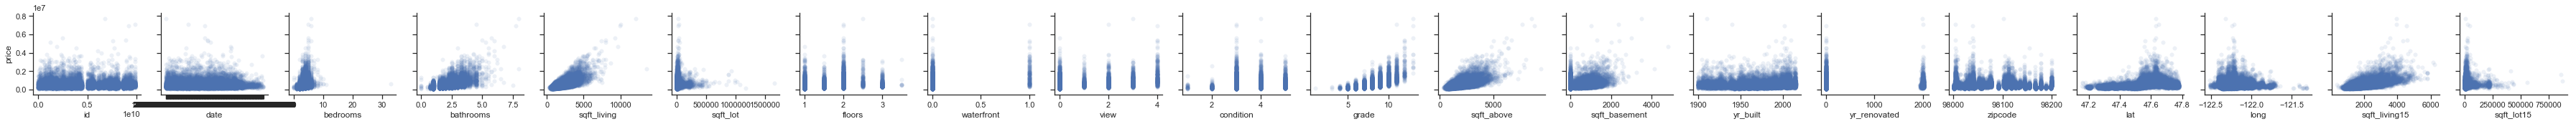

In [3]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(data=df, y_vars=['price'], x_vars=df.columns.drop('price'),
             plot_kws={'alpha': 0.1, 'linewidth':0});

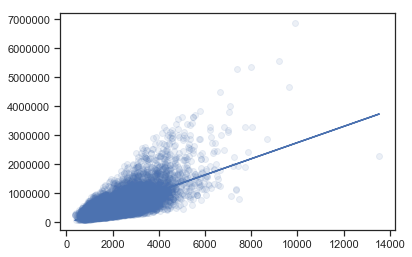

In [3]:
targets = ['price']
predictors = ['sqft_living']

y = df[targets].values
X = df[predictors].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

beta_0 = model.intercept_
beta_i = model.coef_[0]

plt.scatter(X_train, y_train, alpha=0.1)
plt.plot(X_train, [beta_i * _ + beta_0 for _ in X_train]);

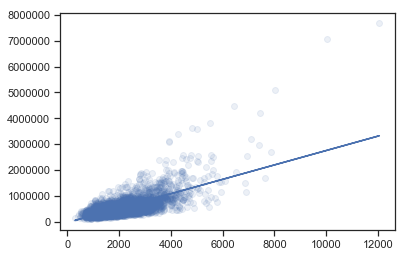

In [4]:
plt.scatter(X_test, y_test, alpha=0.1)
plt.plot(X_test, [beta_i * _ + beta_0 for _ in X_test]);

# Two-variable Multiple Regression

To ramp up slowly, pick a second X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using these two X variables. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your **plane** of best fit to the graph.

Report your Root Mean Squared Error and R-squared for this model.

In [5]:
predictors = ['sqft_living', 'grade']

y = df[targets].values
X = df[predictors].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

beta_0 = model.intercept_
beta_i = model.coef_[0]

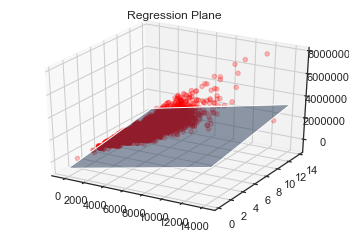

In [6]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['sqft_living'], df['grade'], 
           df[targets], c='red', alpha=0.25)

# Set axes to size of scatter data
x1 = np.array(ax.get_xlim())
y1 = np.array(ax.get_ylim())
xx, yy = np.meshgrid(x1,y1)
zz = beta_i[0]*xx + beta_i[1]*yy + beta_0[0]

# Plot Plane
plt3d = plt.gca(projection='3d')

# Add Opacity to Plane
plt3d.plot_surface(xx, yy, zz, alpha=0.5)
plt.title("Regression Plane")

plt.show()

In [7]:
# from sklearn.metrics import mean_squared_error, r2_score

y_test_predict = model.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_test_predict))
R2 = r2_score(y_test, y_test_predict)

print("RMSE:", RMSE)
print("R^2:", R2)

RMSE: 243902.4135296513
R^2: 0.5419797450455692


# Multiple Regression

Now using all available X variables, split your data into test and training datasets, train your model, obtain its coefficients, and report the Root Mean Squared Error and R-squared values.

In [11]:
df[targets + predictors].cov()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15
price,1.347824e+11,105286.276362,148481.495749,2.367154e+08,1.363437e+09,50908.003884,8460.643388,111772.969096,8687.030331,288026.499738,1.841014e+08,582448.362866,15617.422517,1118.118066,1.472964e+08,8.264591e+08
bedrooms,1.052863e+05,0.865015,0.369527,4.925960e+02,1.221324e+03,0.088104,-0.000530,0.056684,0.017232,0.390254,3.678361e+02,4.212004,-0.001151,0.016958,2.496518e+02,7.426446e+02
bathrooms,1.484815e+05,0.369527,0.593151,5.338120e+02,2.798944e+03,0.208211,0.004247,0.110800,-0.062638,0.602005,4.370876e+02,11.447333,0.002622,0.024191,3.001611e+02,1.833182e+03
sqft_living,2.367154e+08,492.596040,533.811988,8.435337e+05,6.574684e+06,175.540402,8.249461,200.314304,-35.114601,823.407664,6.666978e+05,8580.237559,6.685035,31.071084,4.761601e+05,4.596302e+06
sqft_lot,1.363437e+09,1221.324216,2798.943628,6.574684e+06,1.715659e+09,-116.328567,77.418670,2371.393311,-241.461641,5531.996968,6.294462e+06,64580.849602,-491.766060,1338.836937,4.105319e+06,8.126540e+08
floors,5.090800e+04,0.088104,0.208211,1.755404e+02,-1.163286e+02,0.291588,0.001107,0.012184,-0.092686,0.290824,2.342603e+02,7.761250,0.003712,0.009538,1.035866e+02,-1.661524e+02
waterfront,8.460643e+03,-0.000530,0.004247,8.249461e+00,7.741867e+01,0.001107,0.007485,0.026643,0.000938,0.008418,5.163720e+00,-0.066483,-0.000171,-0.000511,5.127103e+00,7.252979e+01
view,1.117730e+05,0.056684,0.110800,2.003143e+02,2.371393e+03,0.012184,0.026643,0.587243,0.022934,0.226383,1.063870e+02,-1.202897,0.000654,-0.008461,1.472943e+02,1.518526e+03
condition,8.687030e+03,0.017232,-0.062638,-3.511460e+01,-2.414616e+02,-0.092686,0.000938,0.022934,0.423467,-0.110664,-8.525727e+01,-6.908312,-0.001347,-0.009760,-4.140089e+01,-6.050935e+01
grade,2.880265e+05,0.390254,0.602005,8.234077e+02,5.531997e+03,0.290824,0.008418,0.226383,-0.110664,1.381703,7.358054e+02,15.432403,0.018582,0.032838,5.745907e+02,3.827254e+03


In [8]:
predictors = [
    'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
    'waterfront', 'view', 'condition', 'grade', 'sqft_above',
    'yr_built', 'lat', 'long', 'sqft_living15',
    'sqft_lot15'
]


y = df[targets].values
X = df[predictors].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

beta_0 = model.intercept_
beta_i = model.coef_[0]

y_test_predict = model.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_test_predict))
R2 = r2_score(y_test, y_test_predict)

print("RMSE:", RMSE)
print("R^2:", R2)

RMSE: 199136.76998962593
R^2: 0.7009570190793255


# Stretch Goals

Pick from these stretch goals the tasks that you feel like will be the most beneficial for you. 

- Explore the concept of $R^2$, learn how it is calculated and how it relates to covariance, correlation, and variance. 
- Start to research Polynomial Regression and Log-Linear Regression (tomorrow's topics). Find a new regression dataset and try to implement one of these models. 
- Research "Feature Engineering" see what features you can engineer on the above dataset. How much are you able to improve your accuracy with feature engineering?
- Further explore the concept of "Model Validation" - we'll spend a whole week on this soon. What other measures of model accuracy could we have used besides Root Mean Squared Error?
- Write a blog post explaining the basics of Linear Regression.

Remember to share your findings in the slack channel. :)
